In [30]:
import numpy as np

In [71]:
X = 2*np.random.rand(100) # Gives the random number between 0 and 1

In [72]:
X.shape
X.size


100

In [73]:
y = 4 + 3*X + np.random.randn(100) # Give the random number that gives gaussion distribution

## Visualization (Histogram)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

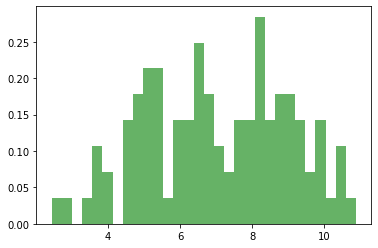

In [75]:
plt.hist(y, bins =30 , density =True , alpha = 0.6 , color = "green")
plt.show()

<Axes: ylabel='Density'>

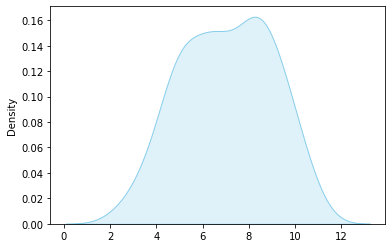

In [76]:
sns.kdeplot(y, fill = True , color = "skyblue")

### Peaks in the KDE plot indicates regions where data is more concentreated, valleys indicates less frequent datapoint , the area under the kde plot sums to 1, just like a probability distribution.
### PDF stands for probability density function its a concept from probability theory and statistics that tells us how likely a contineous random variable is to take on a particulat value. It is a curve that shows the relative likelyhood of different outcomes. For continuous variables, the probability at a single point is 0.|Only areas under the curve over intervals have meaning (like P(a ≤ X ≤ b)).


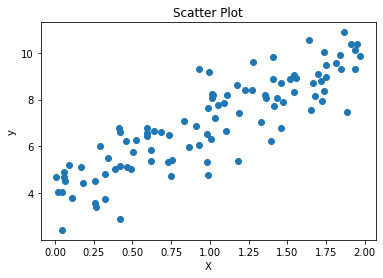

In [77]:
plt.scatter(X,y)
plt.title("Scatter Plot")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [80]:
# Calculating the Parameters
X_b = np.c_[np.ones((100,1)),X]
# np.c_ concatenates the arrays column wise
# It adds a columns of 1s to the left of the array X this is done when you are doing linear regression using matrix operation

In [83]:
theta_best  = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [84]:
theta_best

array([4.09961066, 2.9262995 ])

In [97]:
# Making new prediction using theta
X_test = np.array([[1],[2]])

In [104]:
X_test_b = np.c_[np.ones((2,1)), X_test]

In [111]:
prediction = X_test_b.dot(theta_best.T)

In [112]:
prediction

array([7.02591015, 9.95220965])

In [115]:
X_test_b.shape

(2, 2)